# Chapter 1: Introduction to Time Series

## Chapter 1: Different Types of Data

In [1]:
from __future__ import print_function
import os
import sys
import pandas as pd
import numpy as np
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
os.chdir('D:\Practical Time Series')

In [3]:
data = pd.read_csv('datasets/WDI_csv/WDIData.csv')

In [4]:
print('Column names:', data.columns)

Column names: Index(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code',
       '1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968',
       '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977',
       '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986',
       '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995',
       '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015', '2016', 'Unnamed: 61'],
      dtype='object')


In [5]:
print('No. of rows, columns:', data.shape)

No. of rows, columns: (397056, 62)


In [6]:
nb_indicators = data['Indicator Name'].unique().shape[0]
print('Unique number of indicators:', nb_indicators)

Unique number of indicators: 1504


In [7]:
nb_countries = data['Country Code'].unique().shape[0]
print('Unique number of countries:', nb_countries)

Unique number of countries: 264


In [8]:
central_govt_debt = data.loc[data['Indicator Name']=='Central government debt, total (% of GDP)']
military_exp = data.loc[data['Indicator Name']=='Military expenditure (% of GDP)']

In [9]:
print('Shape of central_govt_debt:', central_govt_debt.shape)
print('Shape of military_exp:', military_exp.shape)

Shape of central_govt_debt: (264, 62)
Shape of military_exp: (264, 62)


In [10]:
central_govt_debt['2010'].describe()

count     93.000000
mean      52.894412
std       30.866372
min        0.519274
25%       28.030110
50%       49.559823
75%       75.289093
max      168.474953
Name: 2010, dtype: float64

In [11]:
military_exp['2010'].describe()

count    194.000000
mean       1.958123
std        1.370594
min        0.000000
25%        1.120302
50%        1.606592
75%        2.594417
max        8.588373
Name: 2010, dtype: float64

In [12]:
central_govt_debt.index = central_govt_debt['Country Code']
military_exp.index = military_exp['Country Code']

In [13]:
central_govt_debt_2010 = central_govt_debt['2010'].loc[~pd.isnull(central_govt_debt['2010'])]
military_exp_2010 = military_exp['2010'].loc[~pd.isnull(military_exp['2010'])]

In [14]:
data_to_plot = pd.concat((central_govt_debt_2010, military_exp_2010), axis=1)

In [15]:
data_to_plot.columns = ['central_govt_debt', 'military_exp']

In [16]:
data_to_plot.head(10)

,central_govt_debt,military_exp
AFG,NaN,1.897473
AGO,NaN,4.244884
ALB,NaN,1.558592
ARB,NaN,5.122879
ARE,NaN,6.119468
ARG,NaN,0.814878
ARM,NaN,4.265646
ATG,75.289093,NaN
AUS,29.356946,1.951809
AUT,79.408304,0.824770


In [17]:
data_to_plot = data_to_plot.loc[(~pd.isnull(data_to_plot.central_govt_debt)) & (~pd.isnull(data_to_plot.military_exp)), :]

In [18]:
data_to_plot.head()

,central_govt_debt,military_exp
AUS,29.356946,1.951809
AUT,79.408304,0.824770
AZE,6.385576,2.791004
BEL,7.022605,1.084631
BGR,21.286254,1.765384


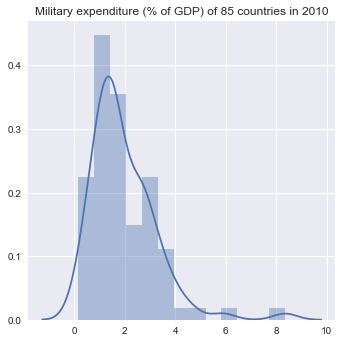

In [19]:
plt.figure(figsize=(5.5, 5.5))
g = sns.distplot(np.array(data_to_plot.military_exp), norm_hist=False)
g.set_title('Military expenditure (% of GDP) of 85 countries in 2010')
plt.savefig('plots/ch1/B07887_01_01.png', format='png', dpi=300)

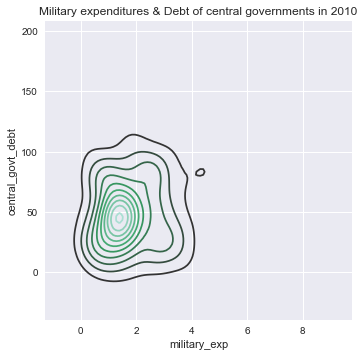

In [20]:
plt.figure(figsize=(5.5, 5.5))
g = sns.kdeplot(data_to_plot.military_exp, data2=data_to_plot.central_govt_debt)
g.set_title('Military expenditures & Debt of central governments in 2010')
plt.savefig('plots/ch1/B07887_01_02.png', format='png', dpi=300)

In [21]:
central_govt_debt_us = central_govt_debt.loc[central_govt_debt['Country Code']=='USA', :].T
military_exp_us = military_exp.loc[military_exp['Country Code']=='USA', :].T

In [22]:
data_us = pd.concat((military_exp_us, central_govt_debt_us), axis=1)

In [23]:
index0 = np.where(data_us.index=='1960')[0][0]
index1 = np.where(data_us.index=='2010')[0][0]

In [24]:
data_us = data_us.iloc[index0:index1+1,:]

In [25]:
data_us.columns = ['Federal Military Expenditure', 'Debt of Federal Government']

In [26]:
data_us.head(20)

,Federal Military Expenditure,Debt of Federal Government
1960,NaN,NaN
1961,NaN,NaN
1962,NaN,NaN
1963,NaN,NaN
1964,NaN,NaN
1965,NaN,NaN
1966,NaN,NaN
1967,NaN,NaN
1968,NaN,NaN
1969,NaN,NaN


In [27]:
#There are null rows for several years possibly due to unavailability of data for these years
data_us.dropna(inplace=True)
print('Shape of data_us:', data_us.shape)

Shape of data_us: (23, 2)


In [31]:
#First 20 rows of data_us after dropping rows with missing values
data_us.head(20)

,Federal Military Expenditure,Debt of Federal Government
1988,5.57993,42.0258
1989,5.37472,43.1439
1990,5.12025,45.3772
1991,4.53985,48.633
1992,4.66626,50.6016
1993,4.32693,50.1657
1994,3.94129,49.3475
1995,3.63849,49.2366
1996,3.35074,46.7174
1997,3.2099,43.2997


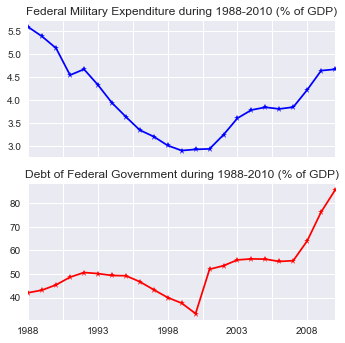

In [28]:
# Two subplots, the axes array is 1-d
f, axarr = plt.subplots(2, sharex=True)
f.set_size_inches(5.5, 5.5)
axarr[0].set_title('Federal Military Expenditure during 1988-2010 (% of GDP)')
data_us['Federal Military Expenditure'].plot(linestyle='-', marker='*', color='b', ax=axarr[0])
axarr[1].set_title('Debt of Federal Government during 1988-2010 (% of GDP)')
data_us['Debt of Federal Government'].plot(linestyle='-', marker='*', color='r', ax=axarr[1])
plt.savefig('plots/ch1/B07887_01_03.png', format='png', dpi=300)

In [29]:
chn = data.ix[(data['Indicator Name']=='Military expenditure (% of GDP)')&\
               (data['Country Code']=='CHN'),index0:index1+1
             ]
chn = pd.Series(data=chn.values[0], index=chn.columns)
chn.dropna(inplace=True)

usa = data.ix[(data['Indicator Name']=='Military expenditure (% of GDP)')&\
               (data['Country Code']=='USA'),index0:index1+1
             ]
usa = pd.Series(data=usa.values[0], index=usa.columns)
usa.dropna(inplace=True)

ind = data.ix[(data['Indicator Name']=='Military expenditure (% of GDP)')&\
               (data['Country Code']=='IND'),index0:index1+1
             ]
ind = pd.Series(data=ind.values[0], index=ind.columns)
ind.dropna(inplace=True)

gbr = data.ix[(data['Indicator Name']=='Military expenditure (% of GDP)')&\
               (data['Country Code']=='GBR'),index0:index1+1
             ]
gbr = pd.Series(data=gbr.values[0], index=gbr.columns)
gbr.dropna(inplace=True)

C:\Users\avpal\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix
  """Entry point for launching an IPython kernel.


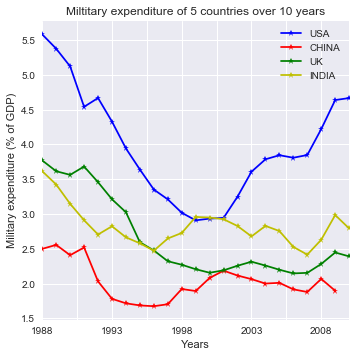

In [30]:
plt.figure(figsize=(5.5, 5.5))
usa.plot(linestyle='-', marker='*', color='b')
chn.plot(linestyle='-', marker='*', color='r')
gbr.plot(linestyle='-', marker='*', color='g')
ind.plot(linestyle='-', marker='*', color='y')
plt.legend(['USA','CHINA','UK','INDIA','RUSSIA'], loc=1)
plt.title('Miltitary expenditure of 5 countries over 10 years')
plt.ylabel('Military expenditure (% of GDP)')
plt.xlabel('Years')
plt.savefig('plots/ch1/B07887_01_04.png', format='png', dpi=300)

## Chapter 1: Internal Structures

In [31]:
from __future__ import print_function
import os
import pandas as pd
import numpy as np
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns

In [3]:
os.chdir('D:/Practical Time Series/')

In [4]:
data = pd.read_excel('datasets/Monthly_CO2_Concentrations.xlsx',
                     converters={'Year': np.int32, 'Month': np.int32})

In [5]:
data.head()

,CO2,Year,Month
0,333.13,1974,5
1,332.09,1974,6
2,331.10,1974,7
3,329.14,1974,8
4,327.36,1974,9


In [6]:
#Create row index of the DataFrame using the Year and Month columns
data.index = data['Year'].astype(str) + '-' + data['Month'].astype(str).map(lambda x: '0'+x if len(x) == 1 else x)
data.head()

,CO2,Year,Month
1974-05,333.13,1974,5
1974-06,332.09,1974,6
1974-07,331.10,1974,7
1974-08,329.14,1974,8
1974-09,327.36,1974,9


In [7]:
data = data.loc[(~pd.isnull(data['CO2']))&\
                (~pd.isnull(data['Year']))&\
                (~pd.isnull(data['Month']))]

In [8]:
data.sort_values(['Year', 'Month'], inplace=True)

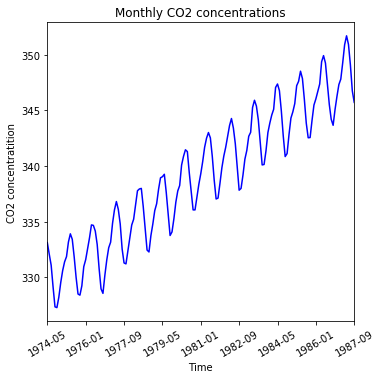

In [26]:
plt.figure(figsize=(5.5, 5.5))
data['CO2'].plot(color='b')
plt.title('Monthly CO2 concentrations')
plt.xlabel('Time')
plt.ylabel('CO2 concentratition')
plt.xticks(rotation=30)
plt.savefig('plots/ch1/B07887_01_05.png', format='png', dpi=300)

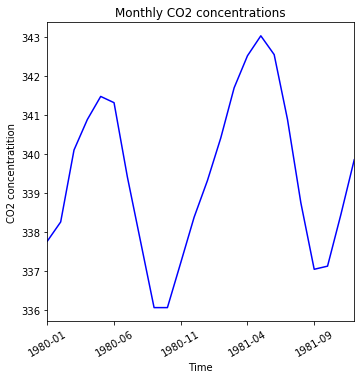

In [27]:
plt.figure(figsize=(5.5, 5.5))
data['CO2'].loc[(data['Year']==1980) | (data['Year']==1981)].plot(color='b')
plt.title('Monthly CO2 concentrations')
plt.xlabel('Time')
plt.ylabel('CO2 concentratition')
plt.xticks(rotation=30)
plt.savefig('plots/ch1/B07887_01_06.png', format='png', dpi=300)

In [11]:
from sklearn.linear_model import LinearRegression

In [12]:
trend_model = LinearRegression(normalize=True, fit_intercept=True)
trend_model.fit(np.arange(data.shape[0]).reshape((-1,1)), data['CO2'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=True)

In [13]:
print('Trend model coefficient={} and intercept={}'.format(trend_model.coef_[0],
                                                           trend_model.intercept_)
      )

Trend model coefficient=0.1209930124223602 and intercept=329.45310559006214


In [14]:
residuals = np.array(data['CO2']) - trend_model.predict(np.arange(data.shape[0]).reshape((-1,1)))

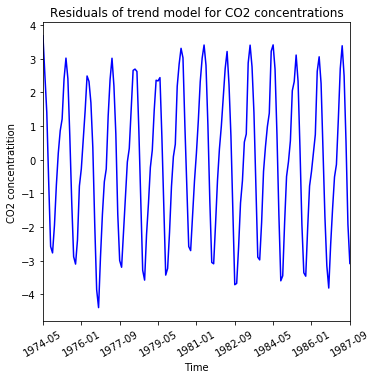

In [28]:
plt.figure(figsize=(5.5, 5.5))
pd.Series(data=residuals, index=data.index).plot(color='b')
plt.title('Residuals of trend model for CO2 concentrations')
plt.xlabel('Time')
plt.ylabel('CO2 concentratition')
plt.xticks(rotation=30)
plt.savefig('plots/ch1/B07887_01_07.png', format='png', dpi=300)

In [16]:
data['Residuals'] = residuals
month_quarter_map = {1: 'Q1', 2: 'Q1', 3: 'Q1',
                     4: 'Q2', 5: 'Q2', 6: 'Q2',
                     7: 'Q3', 8: 'Q3', 9: 'Q3',
                     10: 'Q4', 11: 'Q4', 12: 'Q4'
                    }
data['Quarter'] = data['Month'].map(lambda m: month_quarter_map.get(m))

In [17]:
seasonal_sub_series_data = data.groupby(by=['Year', 'Quarter'])['Residuals'].aggregate([np.mean, np.std])
seasonal_sub_series_data.columns = ['Quarterly Mean', 'Quarterly Standard Deviation']

In [18]:
#Create row indices of seasonal_sub_series_data using Year & Quarter
seasonal_sub_series_data.reset_index(inplace=True)
seasonal_sub_series_data.index = seasonal_sub_series_data['Year'].astype(str) + '-' + seasonal_sub_series_data['Quarter']
seasonal_sub_series_data.head()

,Year,Quarter,Quarterly Mean,Quarterly Standard Deviation
1974-Q2,1974,Q2,3.096398,0.820946
1974-Q3,1974,Q3,-0.616085,1.991671
1974-Q4,1974,Q4,-1.822397,1.014952
1975-Q1,1975,Q1,0.754624,0.511890
1975-Q2,1975,Q2,2.604978,0.355093


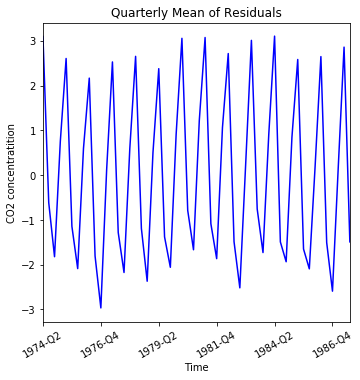

In [29]:
plt.figure(figsize=(5.5, 5.5))
seasonal_sub_series_data['Quarterly Mean'].plot(color='b')
plt.title('Quarterly Mean of Residuals')
plt.xlabel('Time')
plt.ylabel('CO2 concentratition')
plt.xticks(rotation=30)
plt.savefig('plots/ch1/B07887_01_08.png', format='png', dpi=300)

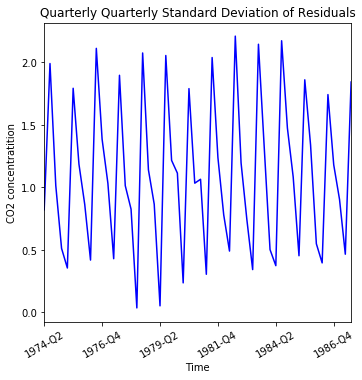

In [30]:
plt.figure(figsize=(5.5, 5.5))
seasonal_sub_series_data['Quarterly Standard Deviation'].plot(color='b')
plt.title('Quarterly Quarterly Standard Deviation of Residuals')
plt.xlabel('Time')
plt.ylabel('CO2 concentratition')
plt.xticks(rotation=30)
plt.savefig('plots/ch1/B07887_01_09.png', format='png', dpi=300)

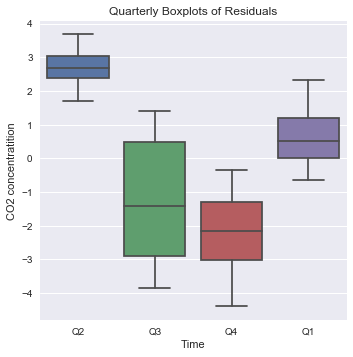

In [33]:
#Multiple box plots to visualize central tendency and dispersion of seasonal sub series
plt.figure(figsize=(5.5, 5.5))
g = sns.boxplot(data=data, y='Residuals', x='Quarter')
g.set_title('Quarterly Boxplots of Residuals')
g.set_xlabel('Time')
g.set_ylabel('CO2 concentratition')
plt.savefig('plots/ch1/B07887_01_10.png', format='png', dpi=300)

In [23]:
inflation = pd.read_excel('datasets/inflation-consumer-prices-annual.xlsx', parse_dates=['Year'])

In [24]:
inflation.head()

,Year,India,United States
0,1960-01-01,1.783265,1.509929
1,1961-01-01,1.752022,1.075182
2,1962-01-01,3.576159,1.116071
3,1963-01-01,2.941176,1.214128
4,1964-01-01,13.354037,1.308615


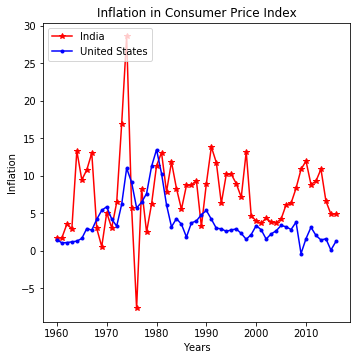

In [25]:
plt.figure(figsize=(5.5, 5.5))
plt.plot(range(1960,2017), inflation['India'], linestyle='-', marker='*', color='r')
plt.plot(range(1960,2017), inflation['United States'], linestyle='-', marker='.', color='b')
plt.legend(['India','United States'], loc=2)
plt.title('Inflation in Consumer Price Index')
plt.ylabel('Inflation')
plt.xlabel('Years')
plt.savefig('plots/ch1/B07887_01_11.png', format='png', dpi=300)

## Chapter 1: Models for Time Series Analysis

In [1]:
import os
import numpy as np
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
os.chdir('D:/Practical Time Series/')

In [3]:
zero_mean_series = np.random.normal(loc=0.0, scale=1., size=100)

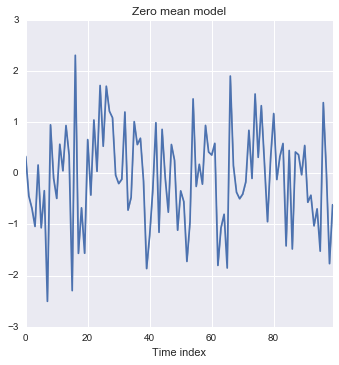

In [4]:
plt.figure(figsize=(5.5, 5.5))
g = sns.tsplot(zero_mean_series)
g.set_title('Zero mean model')
g.set_xlabel('Time index')
plt.savefig('plots/ch1/B07887_01_12.png', format='png', dpi=300)

In [5]:
random_walk = np.cumsum(zero_mean_series)

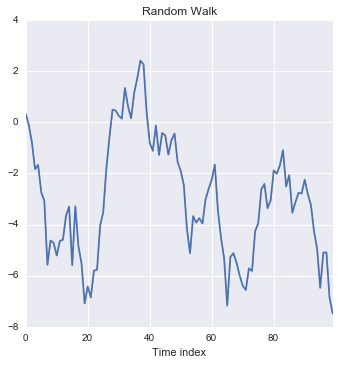

In [6]:
plt.figure(figsize=(5.5, 5.5))
g = sns.tsplot(random_walk)
g.set_title('Random Walk')
g.set_xlabel('Time index')
plt.savefig('plots/ch1/B07887_01_13.png', format='png', dpi=300)

## Chapter 1: Autocorrelation and Partial Autocorrelation

In [15]:
import os
import pandas as pd
%matplotlib inline
from matplotlib import pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [16]:
os.chdir('D:/Practical Time Series')

In [3]:
djia_df = pd.read_excel('datasets/DJIA_Jan2016_Dec2016.xlsx')

In [4]:
#Change the row indices of the dataframe using the Date column
djia_df.index = djia_df['Date']

In [5]:
djia_df.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,,
2016-01-04,2016-01-04,17405.480469,17405.480469,16957.630859,17148.939453,17148.939453,148060000
2016-01-05,2016-01-05,17147.500000,17195.839844,17038.609375,17158.660156,17158.660156,105750000
2016-01-06,2016-01-06,17154.830078,17154.830078,16817.619141,16906.509766,16906.509766,120250000
2016-01-07,2016-01-07,16888.359375,16888.359375,16463.630859,16514.099609,16514.099609,176240000
2016-01-08,2016-01-08,16519.169922,16651.890625,16314.570313,16346.450195,16346.450195,141850000
2016-01-11,2016-01-11,16358.709961,16461.849609,16232.030273,16398.570313,16398.570313,127790000
2016-01-12,2016-01-12,16419.109375,16591.349609,16322.070313,16516.220703,16516.220703,117480000
2016-01-13,2016-01-13,16526.630859,16593.509766,16123.200195,16151.410156,16151.410156,153530000
2016-01-14,2016-01-14,16159.009766,16482.050781,16075.120117,16379.049805,16379.049805,158830000


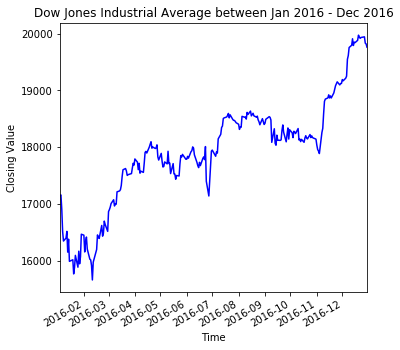

In [10]:
plt.figure(figsize=(5.5, 5.5))
djia_df['Close'].plot(color='b')
plt.title('Dow Jones Industrial Average between Jan 2016 - Dec 2016')
plt.xlabel('Time')
plt.ylabel('Closing Value')
plt.savefig('plots/ch1/B07887_01_14.png', format='png', dpi=300)

In [7]:
lag = range(0,31)
djia_acf = []
for l in lag:
    djia_acf.append(djia_df['Close'].autocorr(l))

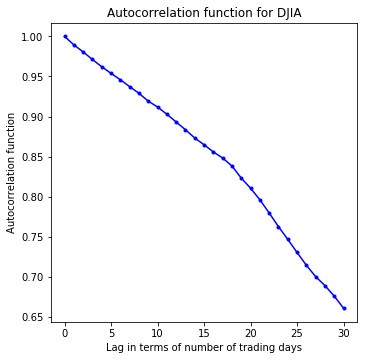

In [9]:
plt.figure(figsize=(5.5, 5.5))
plt.plot(djia_acf, marker='.', color='b')
plt.title('Autocorrelation function for DJIA')
plt.xlabel('Lag in terms of number of trading days')
plt.ylabel('Autocorrelation function')
plt.savefig('plots/ch1/B07887_01_15.png', format='png', dpi=300)

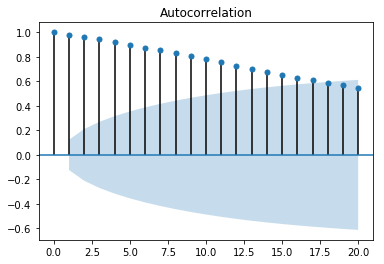

In [22]:
#Plot autocorrelation and confidence intervals using the plot_acf function
plt.figure(figsize=(5.5, 5.5))
plot_acf(djia_df['Close'], lags=20)
plt.savefig('plots/ch1/B07887_01_16.png', format='png', dpi=300)

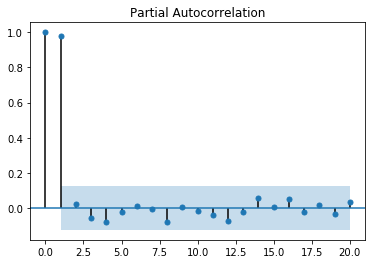

In [19]:
#Plot partial autocorrelation and confidence intervals using the plot_acf function
plt.figure(figsize=(5.5, 5.5))
plot_pacf(djia_df['Close'], lags=20)
plt.savefig('plots/ch1/B07887_01_17.png', format='png', dpi=300)